## What is cross-validation?<br><br>
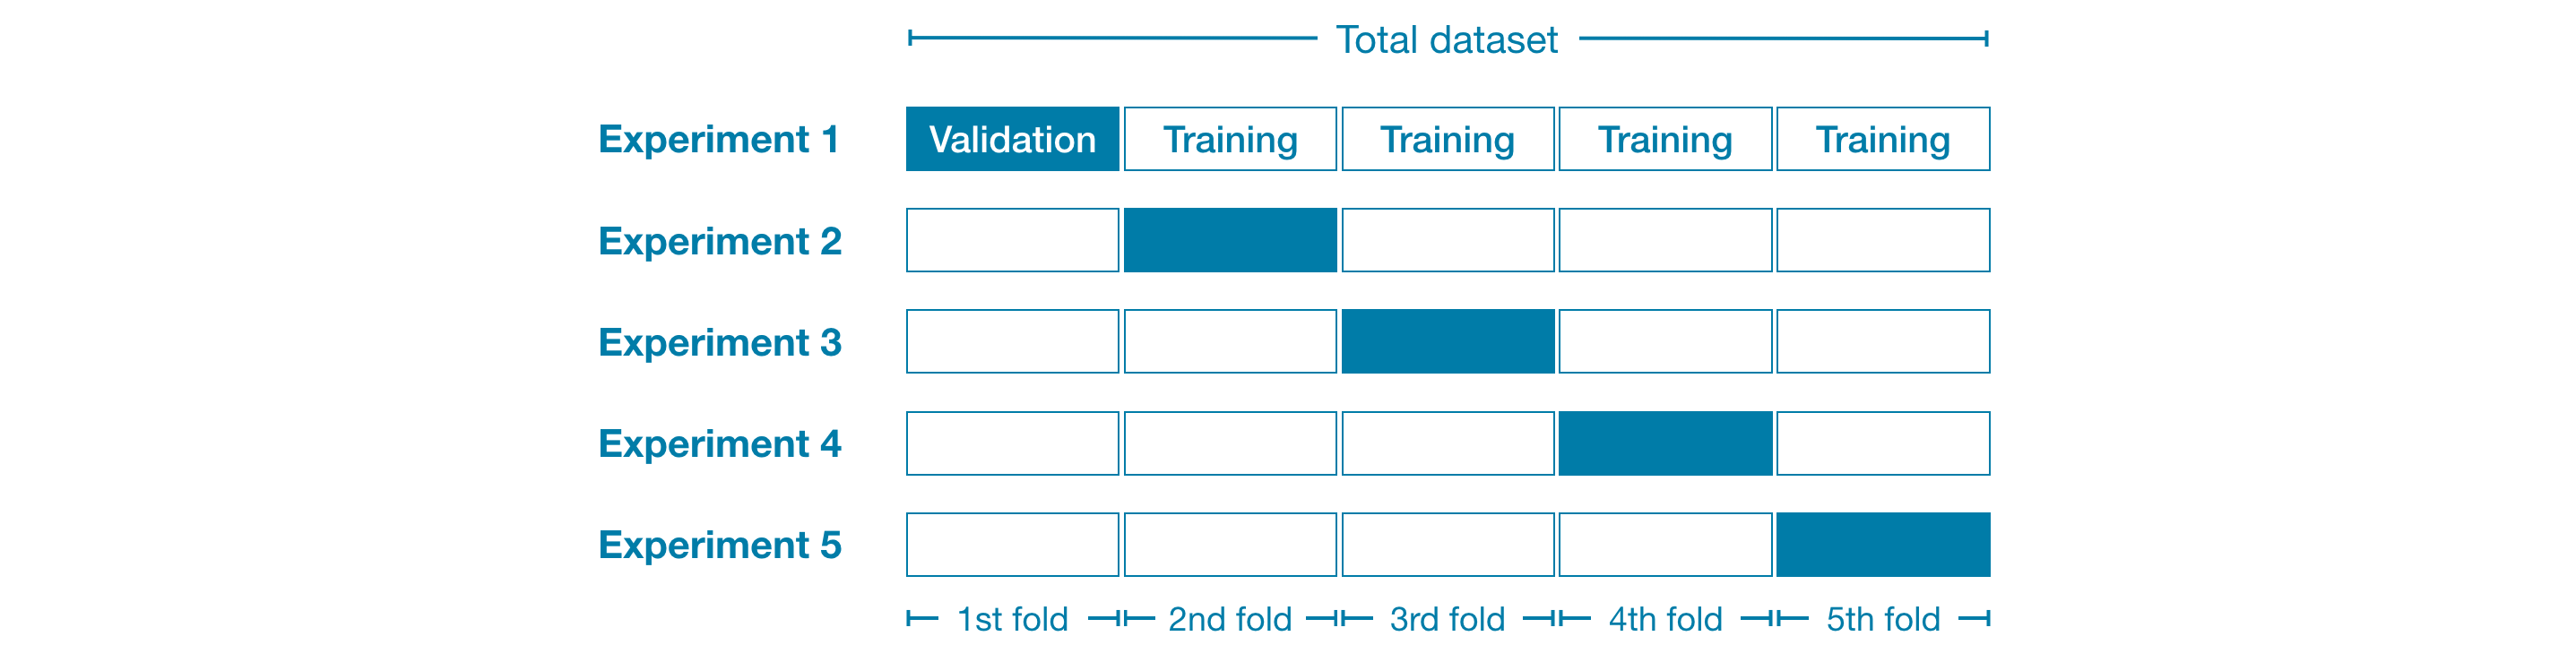

## Example

In [1]:
import pandas as pd

# Read the data
data = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

# Select subset of predictors
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]

# Select target
y = data.Price

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [3]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(my_pipeline, X, y,
                             cv=5,
                             scoring='neg_mean_absolute_error')

print("MAE scores:\n",scores)

MAE scores:
 [301628.7893587  303164.4782723  287298.331666   236061.84754543
 260383.45111427]


In [4]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
277707.3795913405
